### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
from platform import python_version
print(python_version())

3.6.9


In [ ]:
tf.random.set_seed(45)

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# X_train, X_test, y_train, y_test

In [7]:
print(y_test[0:5])

[9 2 1 1 6]


In [8]:
print(y_train[0:5])

[9 0 0 3 0]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [ ]:
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=None,dtype='float32'
)

In [ ]:
y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=None,dtype='float32'
)

In [11]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

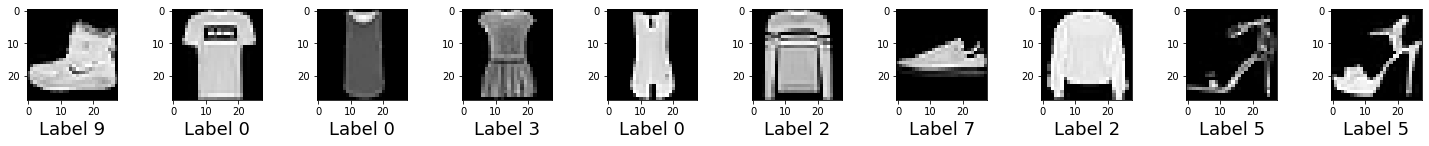

In [12]:
import matplotlib.pyplot as plt
import numpy
fig = plt.figure(figsize=(25,25))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i in range(1, 11):
  ax = fig.add_subplot(1, 10, i)
  ax.imshow(X_train[i-1], cmap=plt.get_cmap('gray'))
  data = numpy.argmax(y_train[i-1], axis=None, out=None)
  plt.xlabel("Label {}".format(data), fontsize=18)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
opt = SGD(learning_rate=0.01)

In [ ]:
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Execute the model using model.fit()

In [16]:
model.fit(X_train, y_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 140.1907 - accuracy: 0.1040
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 2.2778 - accuracy: 0.1111
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 2.2394 - accuracy: 0.1304
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 2.2947 - accuracy: 0.1050
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 2.2661 - accuracy: 0.1150
Epoch 6/20
60000/60000 [==============================] - 4s 63us/sample - loss: 2.2308 - accuracy: 0.1334
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 2.2084 - accuracy: 0.1432
Epoch 8/20
60000/60000 [==============================] - 4s 63us/sample - loss: 2.2037 - accuracy: 0.1439
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 2.2491 - accuracy: 0.1268
Epoch 10/20


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Execute the model

In [19]:
model.fit(X_train, y_train, epochs=75)

Train on 60000 samples
Epoch 1/75
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5677 - accuracy: 0.8035
Epoch 2/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4330 - accuracy: 0.8485
Epoch 3/75
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4067 - accuracy: 0.8568
Epoch 4/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3895 - accuracy: 0.8632
Epoch 5/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3730 - accuracy: 0.8674
Epoch 6/75
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3640 - accuracy: 0.8713
Epoch 7/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3492 - accuracy: 0.8752
Epoch 8/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3397 - accuracy: 0.8782
Epoch 9/75
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3364 - accuracy: 0.8795
Epoch 10/75
60

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [ ]:
opt2 = SGD(learning_rate=0.001)

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1947 - accuracy: 0.9281
Epoch 2/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1888 - accuracy: 0.9304
Epoch 3/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1941 - accuracy: 0.9286
Epoch 4/40
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1977 - accuracy: 0.9279
Epoch 5/40
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1899 - accuracy: 0.9308
Epoch 6/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1917 - accuracy: 0.9301
Epoch 7/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1906 - accuracy: 0.9313
Epoch 8/40
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1861 - accuracy: 0.9325
Epoch 9/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1852 - accuracy: 0.9327
Epoch 10/40
60

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [ ]:
opt2 = SGD(learning_rate=0.03)

In [ ]:
model2 =  tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(100, activation='sigmoid'),
          tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])

In [27]:
model2.fit(X_train, y_train, epochs=80)

Train on 60000 samples
Epoch 1/80
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6532 - accuracy: 0.7791
Epoch 2/80
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4309 - accuracy: 0.8458
Epoch 3/80
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3932 - accuracy: 0.8584
Epoch 4/80
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3692 - accuracy: 0.8669
Epoch 5/80
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3487 - accuracy: 0.8735
Epoch 6/80
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3334 - accuracy: 0.8789
Epoch 7/80
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3200 - accuracy: 0.8840
Epoch 8/80
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3095 - accuracy: 0.8864
Epoch 9/80
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3004 - accuracy: 0.8891
Epoch 10/80
60

## Review model

In [28]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [29]:
model2.predict(X_test)

array([[9.5420667e-08, 6.8053134e-07, 8.6213169e-07, ..., 4.9421404e-05,
        1.0438456e-07, 9.9993873e-01],
       [4.8120237e-05, 6.2035674e-08, 9.9919730e-01, ..., 7.7426876e-08,
        4.0516060e-10, 2.3734076e-07],
       [8.2078934e-08, 9.9999976e-01, 4.9252482e-09, ..., 8.8783958e-10,
        1.1731398e-10, 6.3722222e-10],
       ...,
       [3.3141896e-05, 1.0711743e-09, 3.5360285e-06, ..., 8.0740010e-09,
        9.9995244e-01, 9.4855723e-10],
       [1.1655677e-08, 9.9999881e-01, 1.5896507e-09, ..., 9.7733688e-09,
        3.3074468e-09, 4.6677386e-08],
       [1.7215473e-07, 1.9004739e-07, 3.9637489e-06, ..., 6.8506121e-04,
        8.0229484e-07, 3.6362322e-05]], dtype=float32)

In [30]:
model2.predict_classes(X_test)

array([9, 2, 1, ..., 8, 1, 5])